In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv("/content/data.csv")
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [ ]:
df.dtypes

,0
ad_id,int64
reporting_start,object
reporting_end,object
campaign_id,object
fb_campaign_id,object
age,object
gender,object
interest1,int64
interest2,int64
interest3,int64


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
ad_id,0
reporting_start,0
reporting_end,0
campaign_id,0
fb_campaign_id,0
age,0
gender,0
interest1,0
interest2,0
interest3,0


In [ ]:
df['total_conversion'] = df['total_conversion'].fillna(df['total_conversion'].mean())
df['approved_conversion'] = df['approved_conversion'].fillna(df['approved_conversion'].mean())

In [ ]:
# Convert date columns to datetime
df['reporting_start'] = pd.to_datetime(df['reporting_start'], format='%d/%m/%Y')
df['reporting_end'] = pd.to_datetime(df['reporting_end'], format='%d/%m/%Y')

In [ ]:
# Calculate Campaign Duration
df['campaign_duration'] = (df['reporting_end'] - df['reporting_start']).dt.days
df['campaign_duration'].head()

,campaign_duration
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Calculate Engagement Rate, avoiding division by zero
df['engagement_rate'] = df['clicks'] / df['impressions'].replace(0, 1e-10)
df['engagement_rate'].head()

,engagement_rate
0,0.000136
1,0.000112
2,0.000000
3,0.000235
4,0.000242


In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [ ]:
# Remove duplicate rows
data_unique = df.drop_duplicates()
data_unique.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,campaign_duration,engagement_rate
0,708746,2017-08-17,2017-08-17,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,0,0.000136
1,708749,2017-08-17,2017-08-17,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,0,0.000112
2,708771,2017-08-17,2017-08-17,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,0,0.000000
3,708815,2017-08-30,2017-08-30,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,0,0.000235
4,708818,2017-08-17,2017-08-17,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,0,0.000242


In [ ]:
# Check for NaN or infinite values
print("Checking for NaN values:")
print(df.isna().sum())

print("Checking for infinite values:")
print((df == float('inf')).sum())

Checking for NaN values:
ad_id                  0
reporting_start        0
reporting_end          0
campaign_id            0
fb_campaign_id         0
age                    0
gender                 0
interest1              0
interest2              0
interest3              0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
campaign_duration      0
engagement_rate        0
dtype: int64
Checking for infinite values:
ad_id                  0
reporting_start        0
reporting_end          0
campaign_id            0
fb_campaign_id         0
age                    0
gender                 0
interest1              0
interest2              0
interest3              0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
campaign_duration      0
engagement_rate        0
dtype: int64


In [ ]:
# Drop the specified columns
df.drop(columns=['campaign_id', 'fb_campaign_id','reporting_start','reporting_end'], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['age'] = label_encoder.fit_transform(df['age'])

In [ ]:
df.head()

,ad_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,campaign_duration,engagement_rate
0,708746,32,62,15,17,17,7350.0,1,1.43,2.0,1.0,0,0.000136
1,708749,32,62,16,19,21,17861.0,2,1.82,2.0,0.0,0,0.000112
2,708771,32,62,20,25,22,693.0,0,0.00,1.0,0.0,0,0.000000
3,708815,32,62,28,32,32,4259.0,1,1.25,1.0,0.0,0,0.000235
4,708818,32,62,28,33,32,4133.0,1,1.29,1.0,1.0,0,0.000242


In [ ]:
df.dtypes

,0
ad_id,int64
age,int64
gender,int64
interest1,int64
interest2,int64
interest3,int64
impressions,float64
clicks,int64
spent,float64
total_conversion,float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting features for scaling
X_features = df[['age', 'gender', 'interest1', 'interest2', 'interest3', 'impressions', 'clicks', 'spent', 'campaign_duration', 'engagement_rate']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)
X_scaled

array([[ 0.2029463 ,  0.63677661, -0.68550801, ..., -0.33406171,
         0.        , -0.05926089],
       [ 0.2029463 ,  0.63677661, -0.649208  , ..., -0.32600344,
         0.        , -0.05926089],
       [ 0.2029463 ,  0.63677661, -0.50400797, ..., -0.36360867,
         0.        , -0.05926089],
       ...,
       [-1.92617363, -2.19481906,  3.0170927 , ..., -0.36360867,
         0.        , -0.05926089],
       [-1.71326163, -2.1370314 ,  3.0170927 , ..., -0.32228425,
         0.        , -0.05926089],
       [-1.60680564, -2.02145606,  3.05339271, ..., -0.32228425,
         0.        , -0.05926089]])

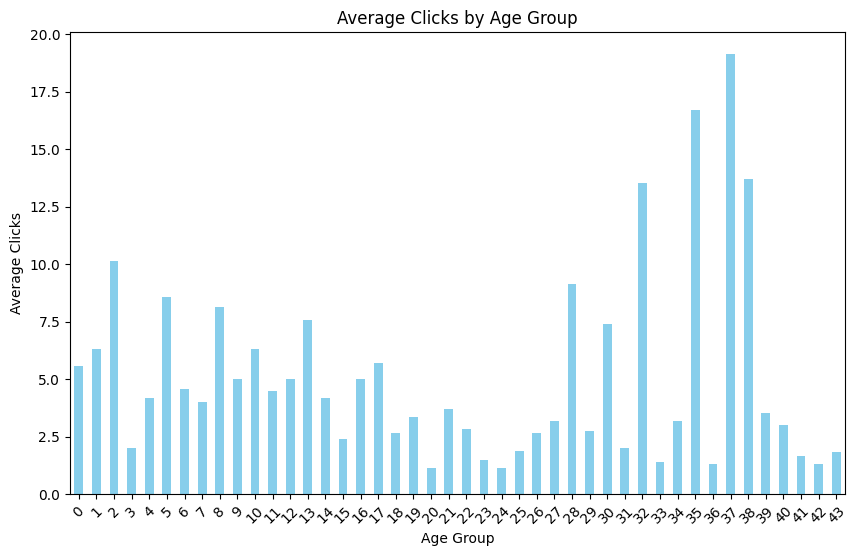

In [ ]:
import matplotlib.pyplot as plt

# Average clicks by age group
avg_clicks = df.groupby('age')['clicks'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
avg_clicks.plot(kind='bar', color='skyblue')
plt.title('Average Clicks by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Clicks')
plt.xticks(rotation=45)
plt.show()

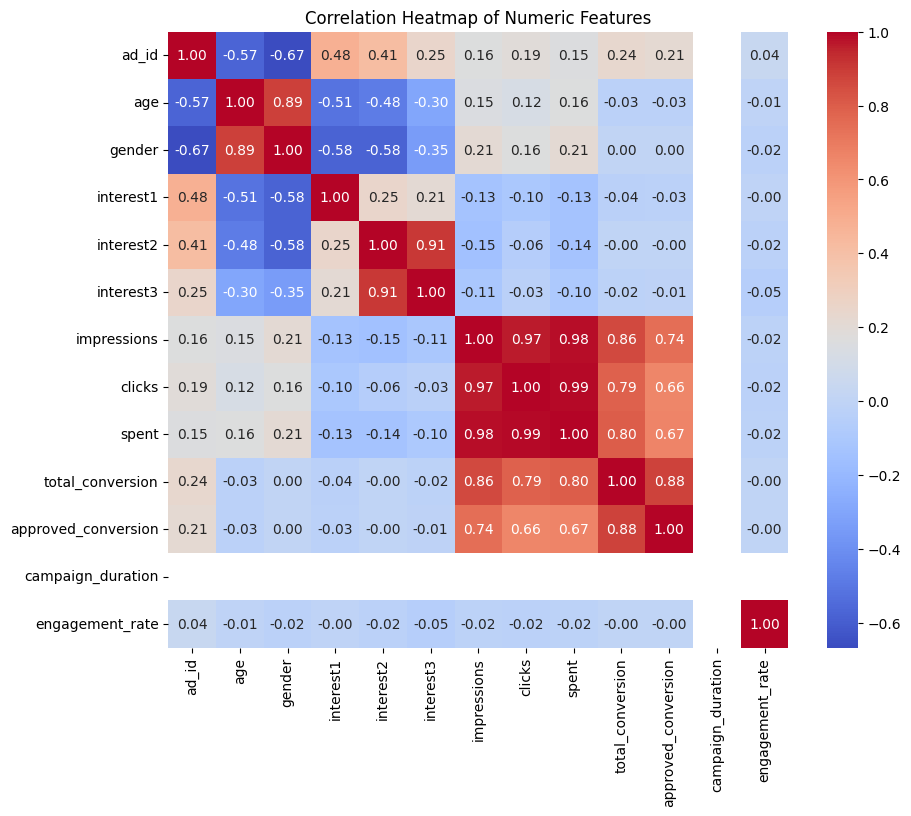

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [ ]:
df['approved_conversion'] = df['approved_conversion'].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=X_features)
y = df['approved_conversion']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (914, 3)
Testing set size: (229, 3)


In [ ]:
print(df.head(5))

    ad_id  age  gender  interest1  interest2  interest3  impressions  clicks  \
0  708746   32      62         15         17         17       7350.0       1   
1  708749   32      62         16         19         21      17861.0       2   
2  708771   32      62         20         25         22        693.0       0   
3  708815   32      62         28         32         32       4259.0       1   
4  708818   32      62         28         33         32       4133.0       1   

   spent  total_conversion  approved_conversion  campaign_duration  \
0   1.43               2.0                    1                  0   
1   1.82               2.0                    0                  0   
2   0.00               1.0                    0                  0   
3   1.25               1.0                    0                  0   
4   1.29               1.0                    1                  0   

   engagement_rate  
0         0.000136  
1         0.000112  
2         0.000000  
3         0.00

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.982532751091703

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00        60
           2       0.75      1.00      0.86         6
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1

    accuracy                           0.98       229
   macro avg       0.36      0.44      0.39       229
weighted avg       0.97      0.98      0.98       229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Define the ANN architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,  # Adjust the epochs as needed
    batch_size=32,  # Batch size for gradient updates
    validation_data=(X_test, y_test)
)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4090 - loss: 48190.9297 - val_accuracy: 0.6900 - val_loss: 4905.4668
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5201 - loss: 27679.5215 - val_accuracy: 0.6900 - val_loss: 1916.8816
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4727 - loss: 21572.0938 - val_accuracy: 0.2620 - val_loss: 4583.0640
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4579 - loss: 25276.1484 - val_accuracy: 0.6900 - val_loss: 1720.0519
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4554 - loss: 24246.0137 - val_accuracy: 0.2620 - val_loss: 3522.7363
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4330 - loss: 22127.7988 - val_accuracy: 0.6900 - val_loss: 2224.7600
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4389 - loss: 17505.9590 - val_accuracy: 0.6900 - val_loss: 2798.8918
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4760

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict on test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6858 - loss: 0.6928 
Test Accuracy: 69.00%
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82       158
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1

    accuracy                           0.69       229
   macro avg       0.09      0.12      0.10       229
weighted avg       0.48      0.69      0.56       229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
